<a href="https://colab.research.google.com/github/ManuuWatson/Forecasting_future-sales-during-festivals./blob/main/Forecasting_future_sales_during_festivals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset**

In [ ]:
import pandas as pd
from experta import *

# Sample data representing sales during Christmas Eve and New Year's Eve (2020-2023)
data = {
    "Festival": ["Christmas Eve", "New Year's Eve", "Christmas Eve", "New Year's Eve", "Christmas Eve", "New Year's Eve",
                 "Christmas Eve", "New Year's Eve", "Christmas Eve", "New Year's Eve", "Christmas Eve", "New Year's Eve",
                 "Christmas Eve", "New Year's Eve", "Christmas Eve", "New Year's Eve"],
    "Year": [2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021, 2022, 2022, 2022, 2022, 2023, 2023, 2023, 2023],
    "Product_Name": ["Christmas Tree", "Champagne", "Gift Set", "Fireworks", "Ornaments", "Balloons",
                     "Christmas Tree", "Party Hats", "Wreath", "Champagne", "Gift Set", "Fireworks",
                     "Christmas Tree", "Balloons", "Wreath", "Party Hats"],
    "Product_Sale": [85, 110, 70, 120, 65, 100, 90, 105, 60, 130, 80, 145, 75, 115, 70, 110]
}

# Create a DataFrame to hold the data
sales_data = pd.DataFrame(data)

# Define a fact class for sales data
class SalesData(Fact):
    """Fact representing the sales of a product during a festival."""
    pass


ModuleNotFoundError: No module named 'experta'

**Define the Expert System and Forecasting Logic**

In [ ]:
# Define the expert system
class SalesForecastingExpert(KnowledgeEngine):

    @Rule(SalesData(festival=MATCH.festival))
    def forecast_products_for_festival(self, festival):
        # Normalize the input to lower case for matching
        festival = festival.lower()

        # Filter the sales data to get products for the given festival (case-insensitive)
        filtered_data = sales_data[sales_data['Festival'].str.lower().str.contains(festival)]

        if not filtered_data.empty:
            print(f"\nProducts that are typically purchased during {festival.capitalize()}:")

            for product in filtered_data['Product_Name'].unique():
                # Get sales for this product during the given festival
                product_sales = filtered_data[filtered_data['Product_Name'] == product]

                # Get previous and current year sales and calculate trend
                previous_year_sales, current_year_sales, sales_trend = self.calculate_sales_trend(product_sales)

                # Calculate percentage change
                if previous_year_sales:
                    percentage_change = ((current_year_sales - previous_year_sales) / previous_year_sales) * 100
                else:
                    percentage_change = 0

                # Print sales information
                print(f"Product: {product}")
                print(f"Previous Year's Sales: {previous_year_sales}")
                print(f"Current Year's Sales: {current_year_sales}")

                # Print forecast based on the percentage trend
                if percentage_change > 0:
                    forecast = f"Expect a {percentage_change:.2f}% increase in future sales."
                elif percentage_change < 0:
                    forecast = f"Expect a {abs(percentage_change):.2f}% decrease in future sales."
                else:
                    forecast = "Expect stable sales."

                print(f"Sales Trend: {forecast}\n")
        else:
            print(f"No historical data found for the festival: {festival.capitalize()}")

    def calculate_sales_trend(self, product_sales):
        """Calculate the sales trend for a product over the years."""
        # Sort by year to ensure the trend is calculated correctly
        product_sales = product_sales.sort_values(by='Year')

        # Get the most recent two years for comparison
        if len(product_sales) >= 2:
            previous_year_sales = product_sales.iloc[-2]['Product_Sale']
            current_year_sales = product_sales.iloc[-1]['Product_Sale']
        else:
            previous_year_sales = None
            current_year_sales = product_sales.iloc[-1]['Product_Sale']

        # Calculate the sales trend (difference)
        sales_trend = current_year_sales - (previous_year_sales or current_year_sales)

        return previous_year_sales, current_year_sales, sales_trend


NameError: name 'KnowledgeEngine' is not defined

**Get User Input and Run the Expert System**

In [ ]:
# Function to get user input for the upcoming festival
def get_user_input():
    festival = input("Enter the upcoming festival (e.g., Christmas, New Year's Eve): ")
    return festival

# Get input from the user and run the expert system
festival = get_user_input()

# Instantiate the expert system
engine = SalesForecastingExpert()

# Declare the facts based on the user input and run the engine
engine.reset()
engine.declare(SalesData(festival=festival))
engine.run()


Enter the upcoming festival (e.g., Christmas, New Year's Eve): New year's eve

Products that are typically purchased during New year's eve:
Product: Champagne
Previous Year's Sales: 110
Current Year's Sales: 130
Sales Trend: Expect a 18.18% increase in future sales.

Product: Fireworks
Previous Year's Sales: 120
Current Year's Sales: 145
Sales Trend: Expect a 20.83% increase in future sales.

Product: Balloons
Previous Year's Sales: 100
Current Year's Sales: 115
Sales Trend: Expect a 15.00% increase in future sales.

Product: Party Hats
Previous Year's Sales: 105
Current Year's Sales: 110
Sales Trend: Expect a 4.76% increase in future sales.



**Data Visualization**

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")


# Grouping the data by Year and Product_Name to get total sales
grouped_data = sales_data.groupby(['Year', 'Product_Name']).sum().reset_index()

# Display the grouped data
grouped_data


,Year,Product_Name,Festival,Product_Sale
0,2020,Champagne,New Year's Eve,110
1,2020,Christmas Tree,Christmas Eve,85
2,2020,Fireworks,New Year's Eve,120
3,2020,Gift Set,Christmas Eve,70
4,2021,Balloons,New Year's Eve,100
5,2021,Christmas Tree,Christmas Eve,90
6,2021,Ornaments,Christmas Eve,65
7,2021,Party Hats,New Year's Eve,105
8,2022,Champagne,New Year's Eve,130
9,2022,Fireworks,New Year's Eve,145


**Create the Bar Plot**

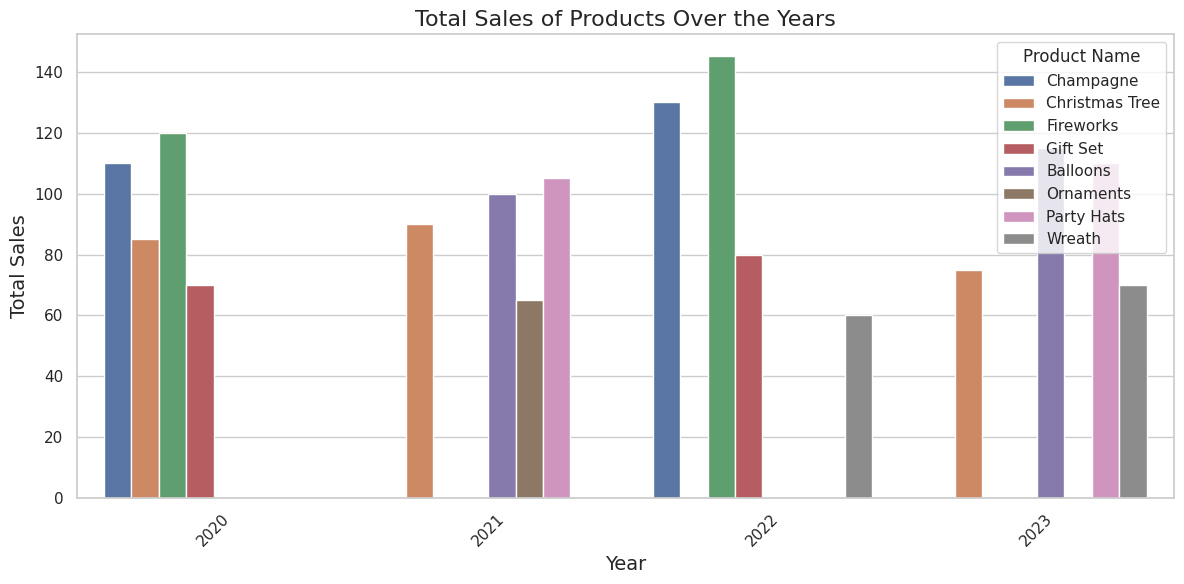

In [ ]:
# Create a bar plot for total sales over the years for each product
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='Year', y='Product_Sale', hue='Product_Name')

# Add titles and labels
plt.title('Total Sales of Products Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(title='Product Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Calculate Current Sales**

In [ ]:
# Calculate current sales for the latest year
latest_year = grouped_data['Year'].max()
current_sales = grouped_data[grouped_data['Year'] == latest_year]

# Display the current sales data
current_sales


,Year,Product_Name,Festival,Product_Sale
12,2023,Balloons,New Year's Eve,115
13,2023,Christmas Tree,Christmas Eve,75
14,2023,Party Hats,New Year's Eve,110
15,2023,Wreath,Christmas Eve,70


**Estimate Future Sales**

In [ ]:
# Assume a fixed percentage increase for future sales (10%)
future_increase_percentage = 0.10
current_sales['Future_Sales'] = current_sales['Product_Sale'] * (1 + future_increase_percentage)

# Display the updated current sales with future projections
current_sales


<ipython-input-47-dfe84f412be4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_sales['Future_Sales'] = current_sales['Product_Sale'] * (1 + future_increase_percentage)


,Year,Product_Name,Festival,Product_Sale,Future_Sales
12,2023,Balloons,New Year's Eve,115,126.5
13,2023,Christmas Tree,Christmas Eve,75,82.5
14,2023,Party Hats,New Year's Eve,110,121.0
15,2023,Wreath,Christmas Eve,70,77.0


**Combine Data for Visualization**

In [ ]:
# Melt the data to have a long format suitable for seaborn
combined_sales = current_sales.melt(id_vars=['Product_Name'], value_vars=['Product_Sale', 'Future_Sales'],
                                     var_name='Sales_Type', value_name='Sales_Value')

# Display the combined sales data
combined_sales


,Product_Name,Sales_Type,Sales_Value
0,Balloons,Product_Sale,115.0
1,Christmas Tree,Product_Sale,75.0
2,Party Hats,Product_Sale,110.0
3,Wreath,Product_Sale,70.0
4,Balloons,Future_Sales,126.5
5,Christmas Tree,Future_Sales,82.5
6,Party Hats,Future_Sales,121.0
7,Wreath,Future_Sales,77.0


**Create the Bar Visualization**

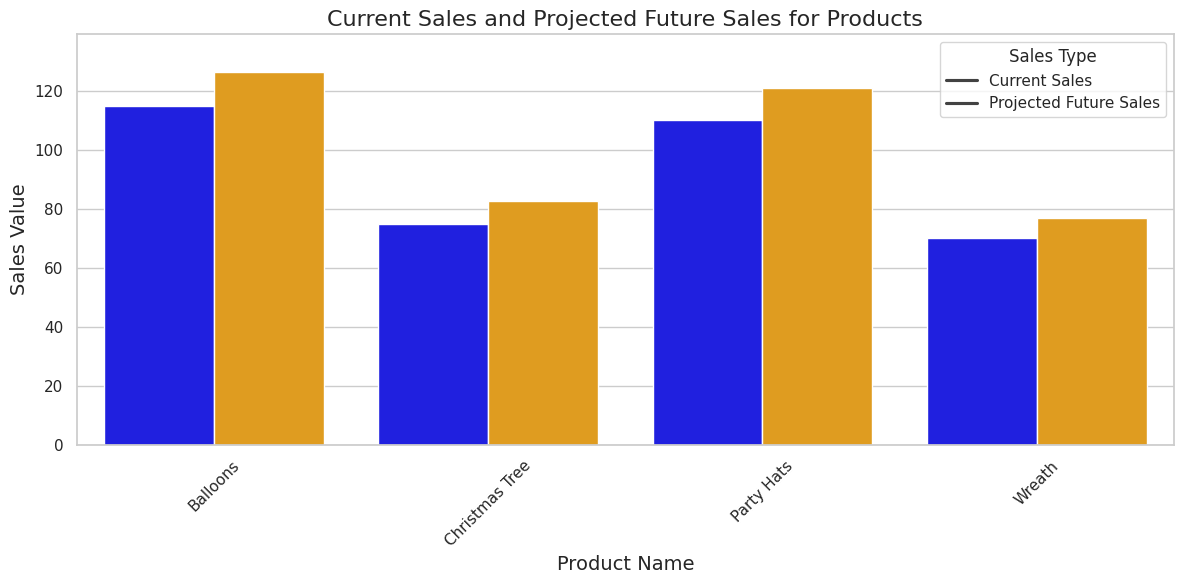

In [ ]:
# Create a bar plot for current and future sales for each product
plt.figure(figsize=(12, 6))

# Define a custom color palette
custom_palette = {'Product_Sale': 'blue', 'Future_Sales': 'orange'}

# Create the bar plot with the custom palette
sns.barplot(data=combined_sales, x='Product_Name', y='Sales_Value', hue='Sales_Type', palette=custom_palette)

# Add titles and labels
plt.title('Current Sales and Projected Future Sales for Products', fontsize=16)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Sales Value', fontsize=14)

# Set y-axis limits
plt.ylim(0, max(combined_sales['Sales_Value']) * 1.1)  # Set the upper limit to 10% above the max sales value

plt.xticks(rotation=45)
plt.legend(title='Sales Type', labels=['Current Sales', 'Projected Future Sales'])
plt.tight_layout()
plt.show()
